In [137]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [138]:
data = pd.read_csv("C:/Users/omkar/Desktop/Power Bi dataset/amazon_prime_users.csv")

In [139]:
data.head()

,Use_ID,Name,Email_Address,Username,Date_of_Birth,Gender,Location,Membership_Start_Date,Membership_End_Date,Subscription_Plan,Payment_Information,Renewal_Status,Usage_Frequency,Purchase_History,Favorite_Genres,Devices_Used,Engagement_Metrics,Feedback/Ratings,Customer_Support_Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [140]:
print("Number of Datapoints:", len(data))


Number of Datapoints: 2500


In [141]:
data.dtypes

Use_ID                             int64
Name                              object
Email_Address                     object
Username                          object
Date_of_Birth                     object
Gender                            object
Location                          object
Membership_Start_Date             object
Membership_End_Date               object
Subscription_Plan                 object
Payment_Information               object
Renewal_Status                    object
Usage_Frequency                   object
Purchase_History                  object
Favorite_Genres                   object
Devices_Used                      object
Engagement_Metrics                object
Feedback/Ratings                 float64
Customer_Support_Interactions      int64
dtype: object

In [142]:
df = data.copy()


In [143]:
df.describe()

,Use_ID,Feedback/Ratings,Customer_Support_Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


In [144]:
df.dtypes

Use_ID                             int64
Name                              object
Email_Address                     object
Username                          object
Date_of_Birth                     object
Gender                            object
Location                          object
Membership_Start_Date             object
Membership_End_Date               object
Subscription_Plan                 object
Payment_Information               object
Renewal_Status                    object
Usage_Frequency                   object
Purchase_History                  object
Favorite_Genres                   object
Devices_Used                      object
Engagement_Metrics                object
Feedback/Ratings                 float64
Customer_Support_Interactions      int64
dtype: object

In [145]:
col_del = ["Use_ID","Name","Email_Address","Username","Location"]

df = df.drop(col_del, axis=1)

In [146]:
df.dtypes

Date_of_Birth                     object
Gender                            object
Membership_Start_Date             object
Membership_End_Date               object
Subscription_Plan                 object
Payment_Information               object
Renewal_Status                    object
Usage_Frequency                   object
Purchase_History                  object
Favorite_Genres                   object
Devices_Used                      object
Engagement_Metrics                object
Feedback/Ratings                 float64
Customer_Support_Interactions      int64
dtype: object

In [147]:
# Feature Engineering
#1 Creating Age Column 
# 2 Membership Duration

In [148]:
from datetime import datetime
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format='%Y-%m-%d')

# Calculate age
today = datetime.now()  # Use datetime.now() instead of datetime.today()

# Extract age
df['Age'] = df['Date_of_Birth'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))

# Display the DataFrame with the Age column
print(df)

     Date_of_Birth  Gender Membership_Start_Date Membership_End_Date   
0       1953-06-03    Male            2024-01-15          2025-01-14  \
1       1978-07-08    Male            2024-01-07          2025-01-06   
2       1994-12-06  Female            2024-04-13          2025-04-13   
3       1964-12-22  Female            2024-01-24          2025-01-23   
4       1961-06-04    Male            2024-02-14          2025-02-13   
...            ...     ...                   ...                 ...   
2495    1967-08-19    Male            2024-01-25          2025-01-24   
2496    1980-10-23    Male            2024-03-03          2025-03-03   
2497    1972-03-31  Female            2024-02-09          2025-02-08   
2498    1965-08-02  Female            2024-02-18          2025-02-17   
2499    1972-11-13  Female            2024-01-28          2025-01-27   

     Subscription_Plan Payment_Information Renewal_Status Usage_Frequency   
0               Annual          Mastercard         Manual 

In [149]:
print(df["Age"])

0       71
1       46
2       29
3       59
4       63
        ..
2495    57
2496    43
2497    52
2498    59
2499    51
Name: Age, Length: 2500, dtype: int64


In [150]:
# Membership Duration
df["Membership_Start_Date"] = pd.to_datetime(df["Membership_Start_Date"], format='%Y-%m-%d')
df["Membership_End_Date"] = pd.to_datetime(df["Membership_End_Date"], format='%Y-%m-%d')

df["Membership_Duration"] = df["Membership_End_Date"] - df["Membership_Start_Date"]

print(df["Membership_Duration"])

0      365 days
1      365 days
2      365 days
3      365 days
4      365 days
         ...   
2495   365 days
2496   365 days
2497   365 days
2498   365 days
2499   365 days
Name: Membership_Duration, Length: 2500, dtype: timedelta64[ns]


In [151]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Variables in the Dataset :", object_cols)

Categorical Variables in the Dataset : ['Gender', 'Subscription_Plan', 'Payment_Information', 'Renewal_Status', 'Usage_Frequency', 'Purchase_History', 'Favorite_Genres', 'Devices_Used', 'Engagement_Metrics']


In [152]:
LE = LabelEncoder()
for i in object_cols:
    df[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")   

All features are now numerical


In [153]:
df.dtypes

Date_of_Birth                     datetime64[ns]
Gender                                     int32
Membership_Start_Date             datetime64[ns]
Membership_End_Date               datetime64[ns]
Subscription_Plan                          int32
Payment_Information                        int32
Renewal_Status                             int32
Usage_Frequency                            int32
Purchase_History                           int32
Favorite_Genres                            int32
Devices_Used                               int32
Engagement_Metrics                         int32
Feedback/Ratings                         float64
Customer_Support_Interactions              int64
Age                                        int64
Membership_Duration              timedelta64[ns]
dtype: object

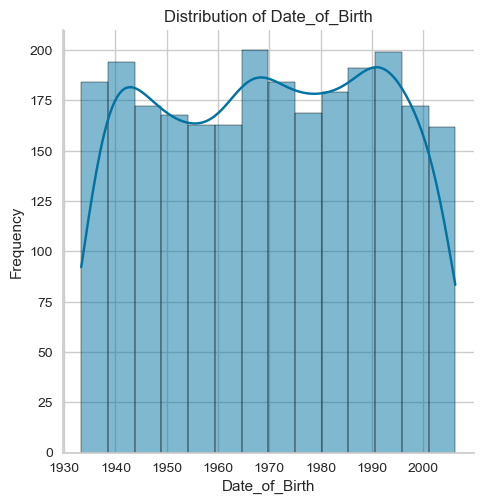

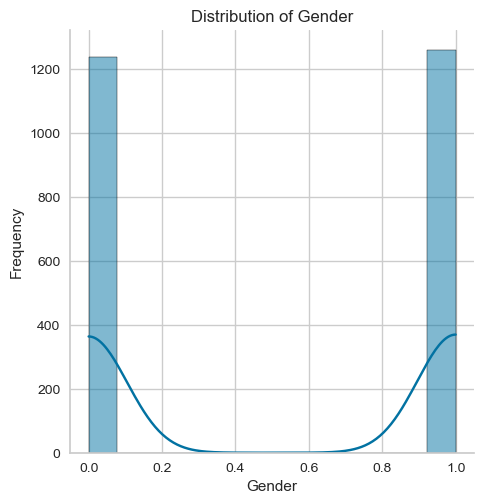

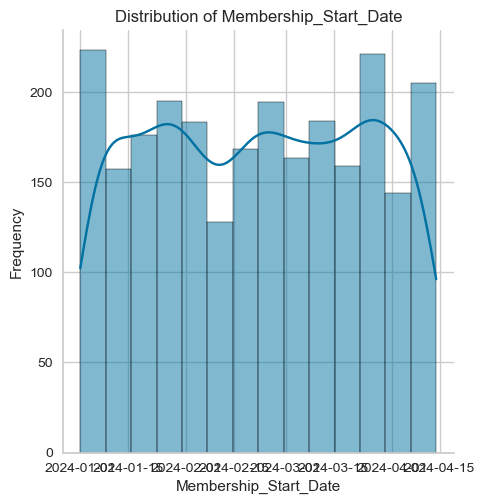

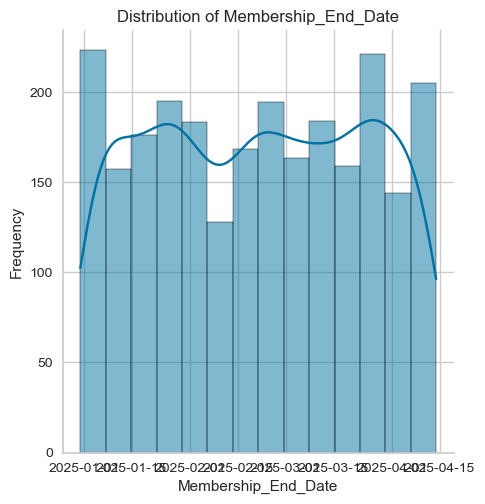

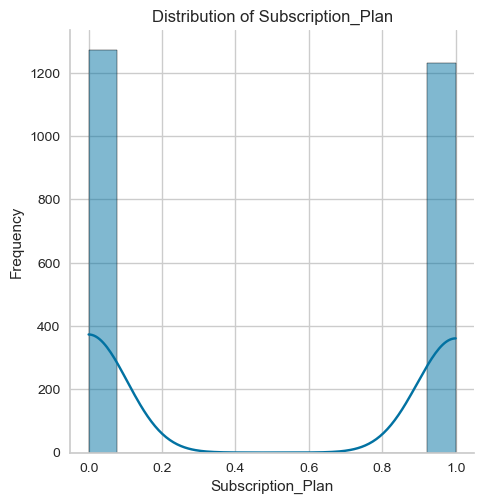

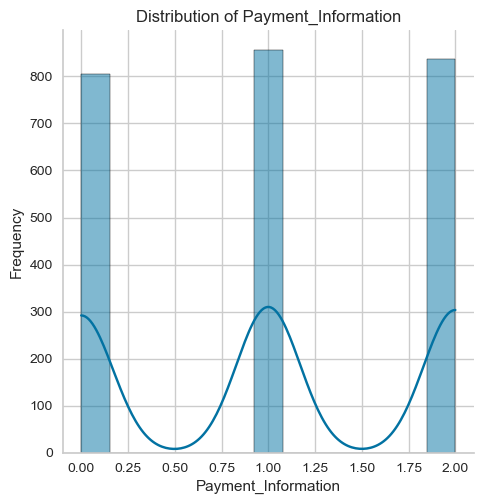

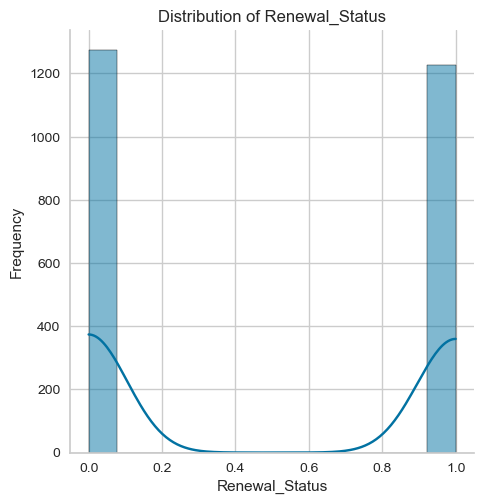

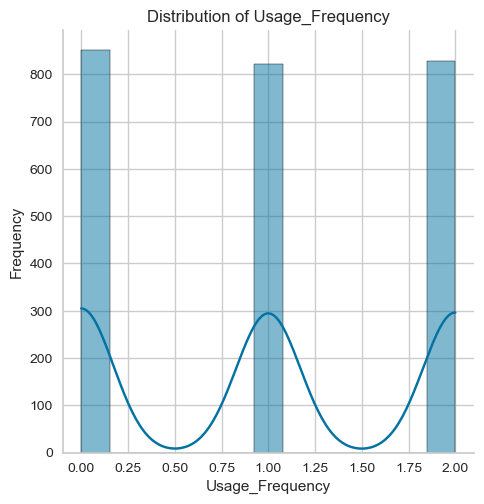

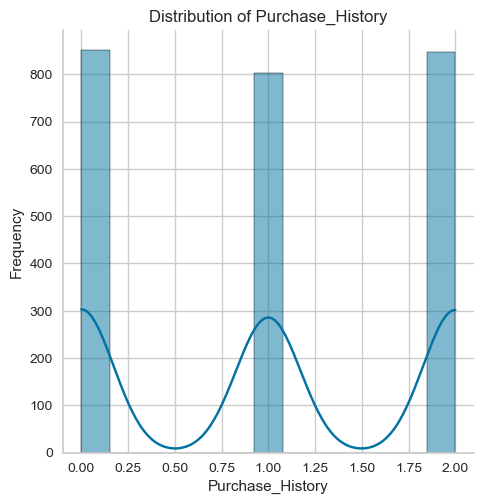

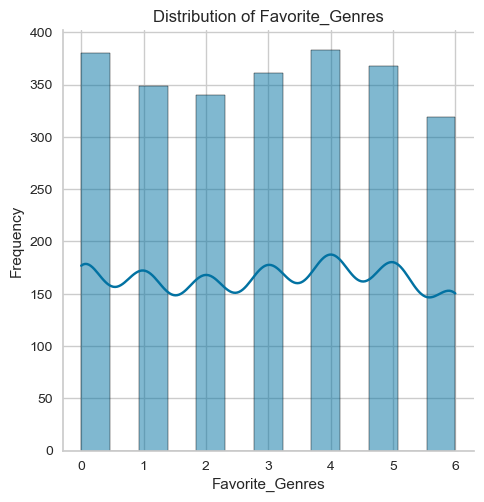

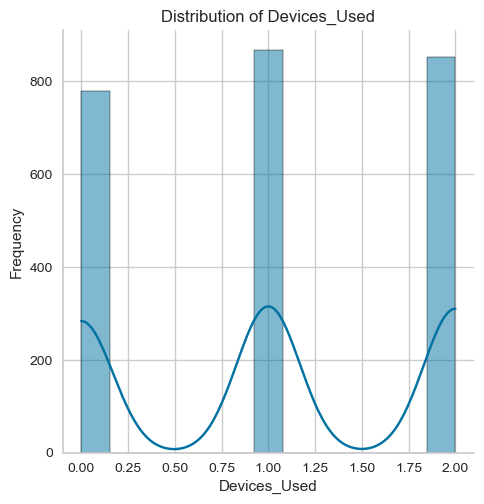

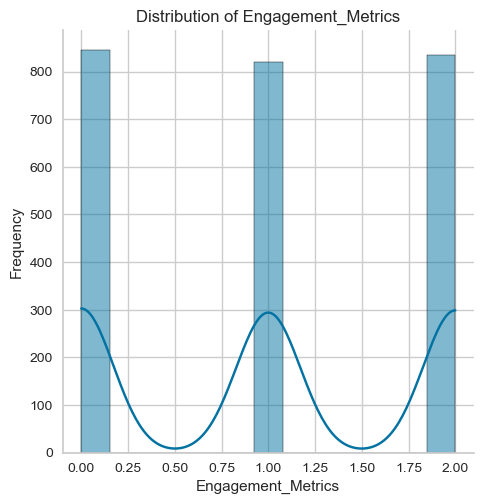

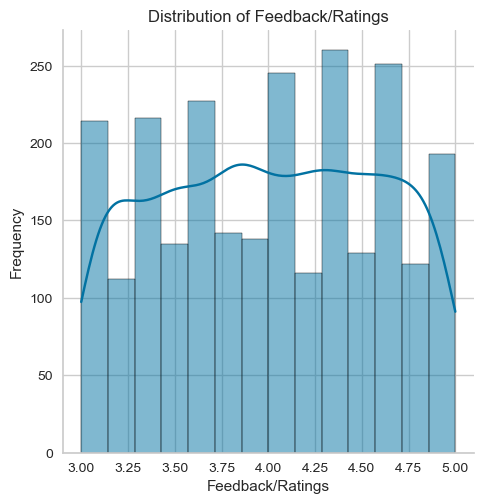

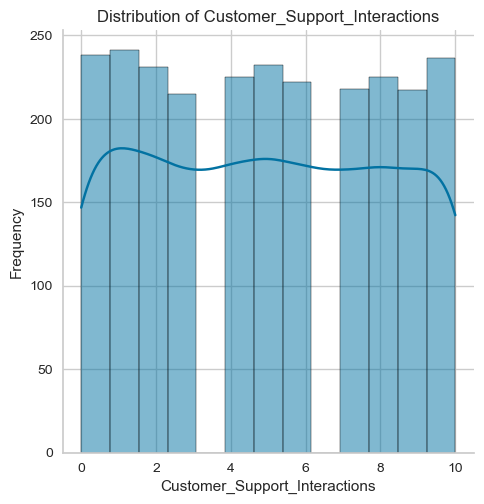

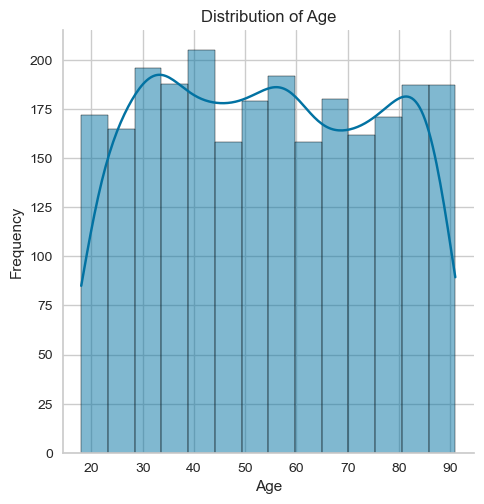

ValueError: zero-size array to reduction operation minimum which has no identity

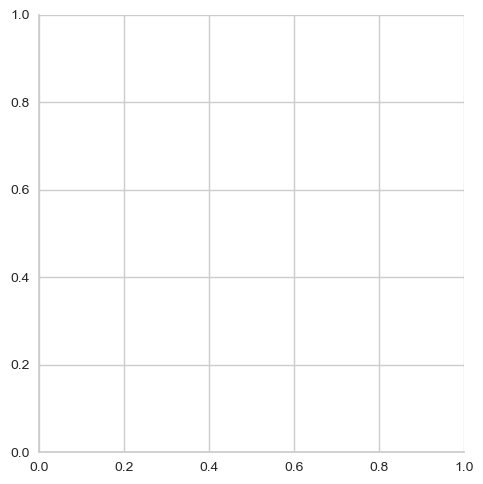

In [154]:
for column in df.columns:
    sns.displot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [155]:
col2_del = ["Membership_Start_Date","Membership_End_Date","Date_of_Birth"]

df = df.drop(col2_del, axis=1)
df.dtypes

Gender                                     int32
Subscription_Plan                          int32
Payment_Information                        int32
Renewal_Status                             int32
Usage_Frequency                            int32
Purchase_History                           int32
Favorite_Genres                            int32
Devices_Used                               int32
Engagement_Metrics                         int32
Feedback/Ratings                         float64
Customer_Support_Interactions              int64
Age                                        int64
Membership_Duration              timedelta64[ns]
dtype: object

In [156]:
df['Membership_Duration'] = df['Membership_Duration'] / pd.Timedelta(days=1)

# Convert to integer if needed
df['Membership_Duration'] = df['Membership_Duration'].astype(int)

# Display the DataFrame
print(df)

      Gender  Subscription_Plan  Payment_Information  Renewal_Status   
0          1                  0                    1               1  \
1          1                  1                    2               1   
2          0                  1                    1               1   
3          0                  1                    0               0   
4          1                  0                    2               0   
...      ...                ...                  ...             ...   
2495       1                  0                    2               0   
2496       1                  0                    0               1   
2497       0                  0                    2               1   
2498       0                  1                    2               1   
2499       0                  0                    2               0   

      Usage_Frequency  Purchase_History  Favorite_Genres  Devices_Used   
0                   2                 2                2     

In [ ]:
df.dtypes

In [157]:
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("All features are now scaled")

All features are now scaled


In [158]:
print(scaled_df)

        Gender  Subscription_Plan  Payment_Information  Renewal_Status   
0     0.992032          -0.983339            -0.015786        1.019388  \
1     0.992032           1.016944             1.217526        1.019388   
2    -1.008032           1.016944            -0.015786        1.019388   
3    -1.008032           1.016944            -1.249099       -0.980981   
4     0.992032          -0.983339             1.217526       -0.980981   
...        ...                ...                  ...             ...   
2495  0.992032          -0.983339             1.217526       -0.980981   
2496  0.992032          -0.983339            -1.249099        1.019388   
2497 -1.008032          -0.983339             1.217526        1.019388   
2498 -1.008032           1.016944             1.217526        1.019388   
2499 -1.008032          -0.983339             1.217526       -0.980981   

      Usage_Frequency  Purchase_History  Favorite_Genres  Devices_Used   
0            1.232404          1.2153

<Axes: >

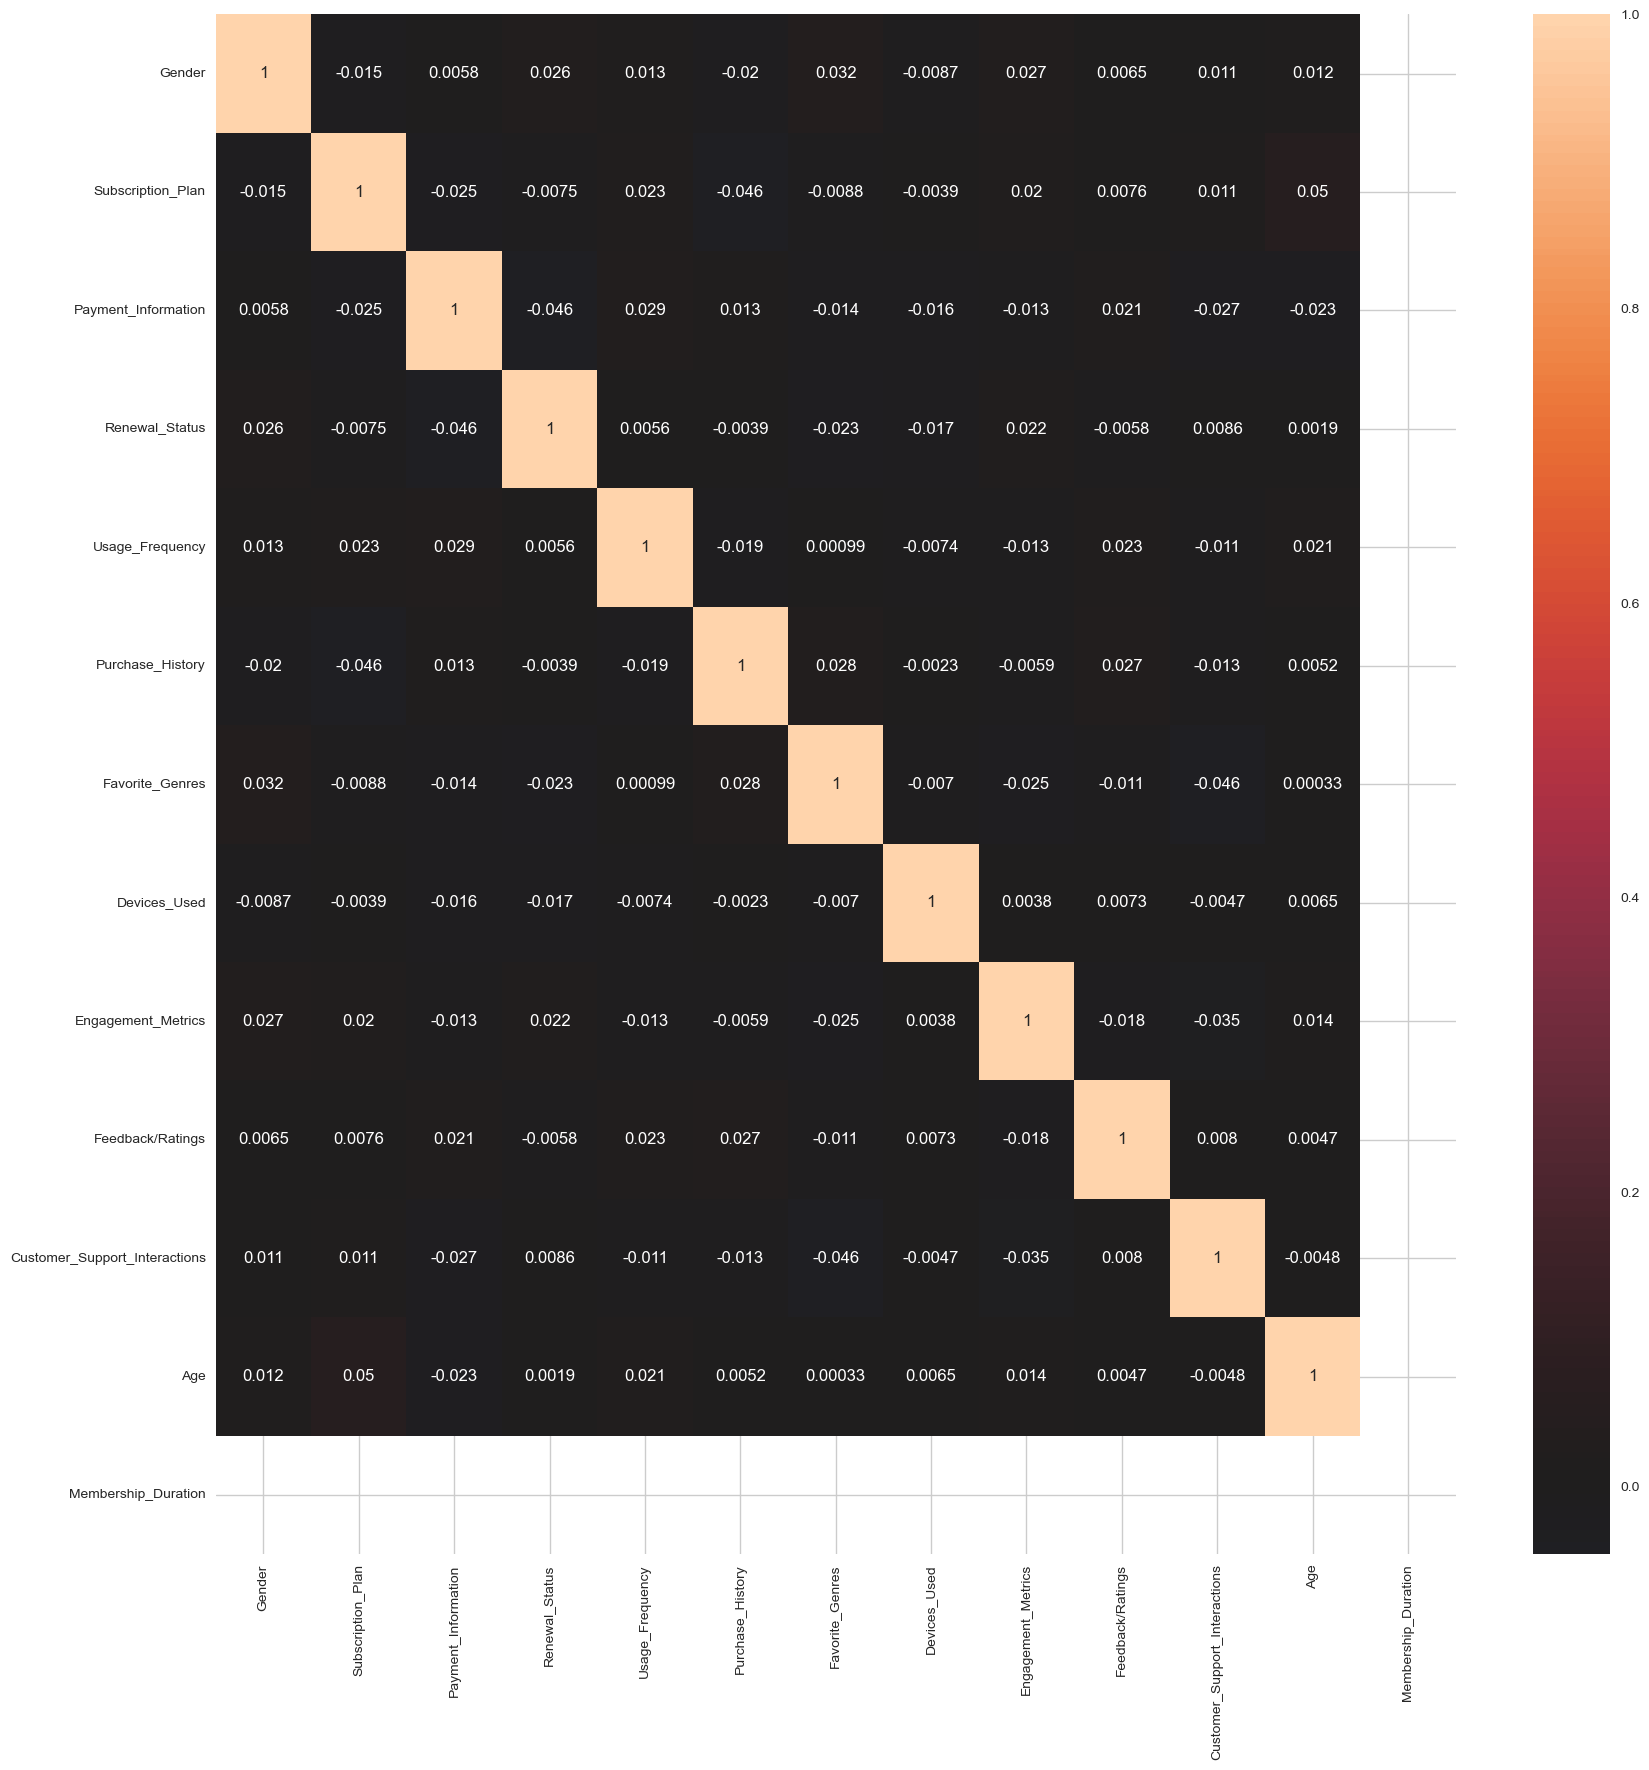

In [159]:
corr = scaled_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,center=0)

In [160]:
pca = PCA(n_components=2)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=["col1","col2"])
PCA_df.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2500.0,1.634248e-17,1.054331,-2.828197,-0.751138,-0.016275,0.732509,3.590177
col2,2500.0,1.705303e-17,1.033625,-3.048112,-0.727219,0.014712,0.724520,3.093565


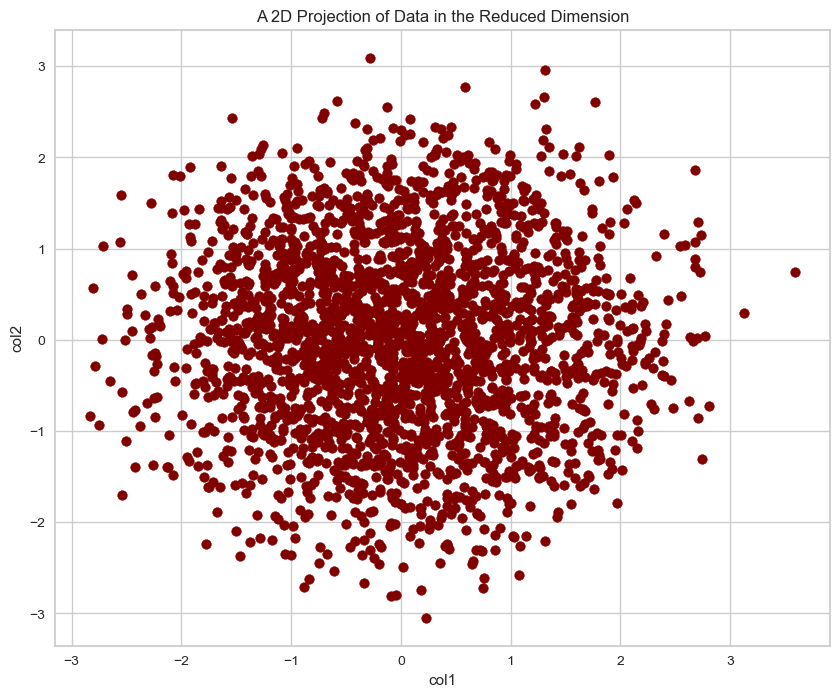

In [161]:
x =PCA_df["col1"]
y =PCA_df["col2"]
#z =PCA_df["col3"]
#To plot
#fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(111, projection="2d")
#ax.scatter(x,y c="maroon", marker="o" )
#ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
#plt.show()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)  # No projection needed for 2D
ax.scatter(x, y, c="maroon", marker="o")
ax.set_title("A 2D Projection of Data in the Reduced Dimension")
ax.set_xlabel('col1')
ax.set_ylabel('col2')
plt.show()

Elbow Method to determine the number of clusters to be formed:


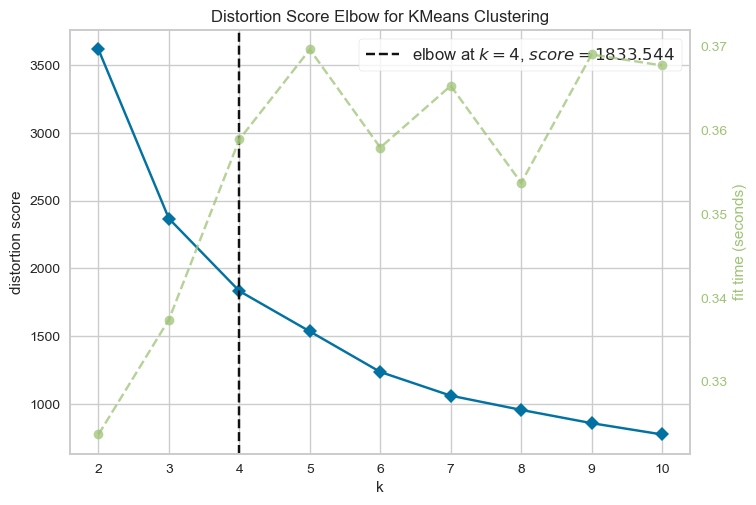

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [162]:

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [163]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
data["Clusters"] = yhat_AC
scaled_df["Clusters"] = yhat_AC
df["Clusters"] = yhat_AC

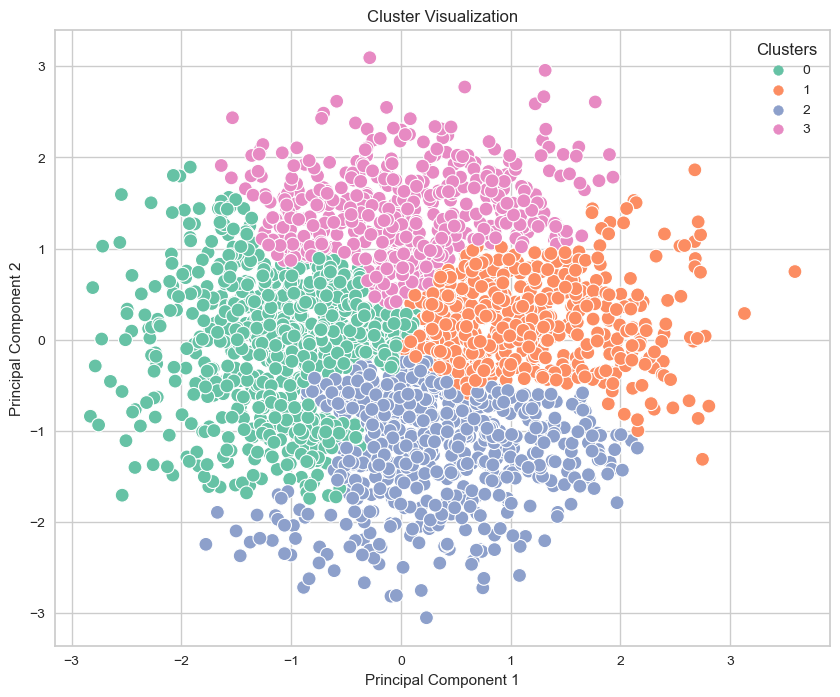

In [164]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x, y=y, hue=PCA_df["Clusters"], palette="Set2", s=100, marker="o")
plt.title("Cluster Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Clusters', loc='best')
plt.show()

Text(0.5, 1.0, 'distribution of Clusters')

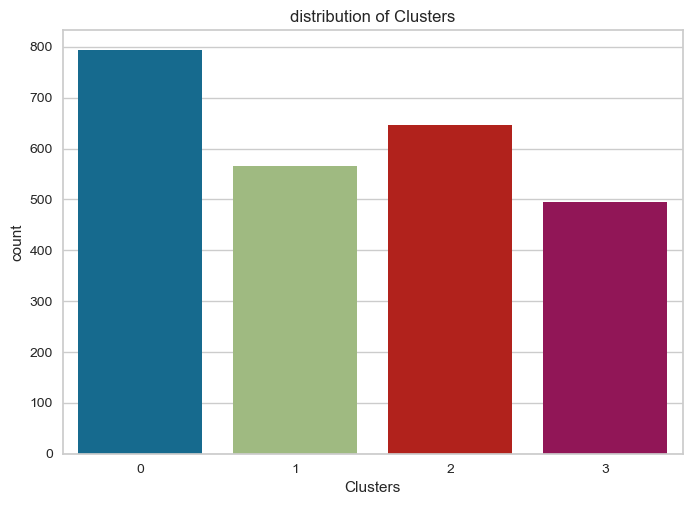

In [166]:
pl = sns.countplot(x=data["Clusters"])
pl.set_title("distribution of Clusters")

In [167]:
data.dtypes

Use_ID                             int64
Name                              object
Email_Address                     object
Username                          object
Date_of_Birth                     object
Gender                            object
Location                          object
Membership_Start_Date             object
Membership_End_Date               object
Subscription_Plan                 object
Payment_Information               object
Renewal_Status                    object
Usage_Frequency                   object
Purchase_History                  object
Favorite_Genres                   object
Devices_Used                      object
Engagement_Metrics                object
Feedback/Ratings                 float64
Customer_Support_Interactions      int64
Clusters                           int64
dtype: object

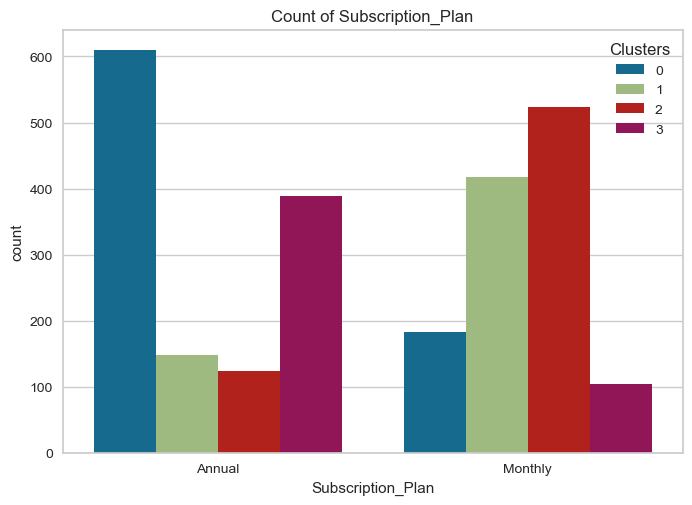

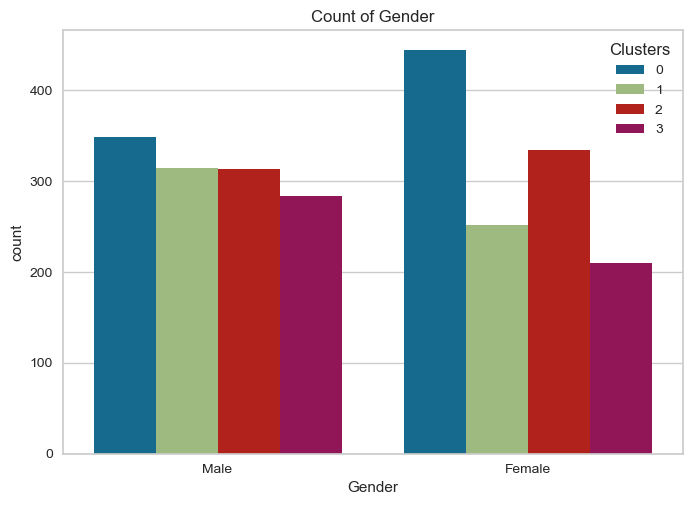

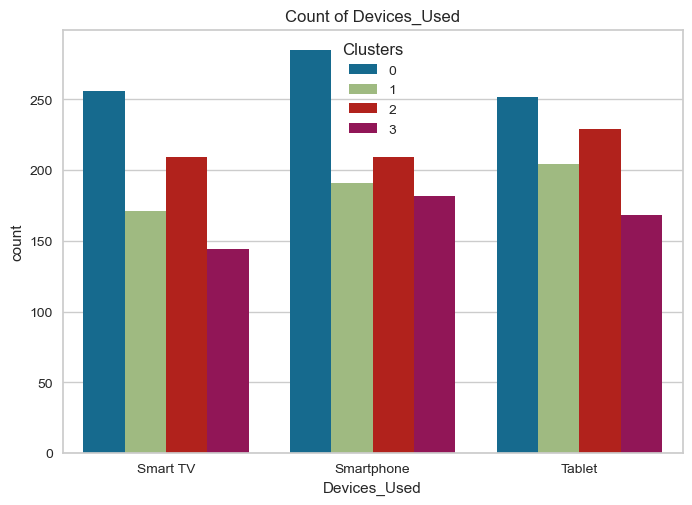

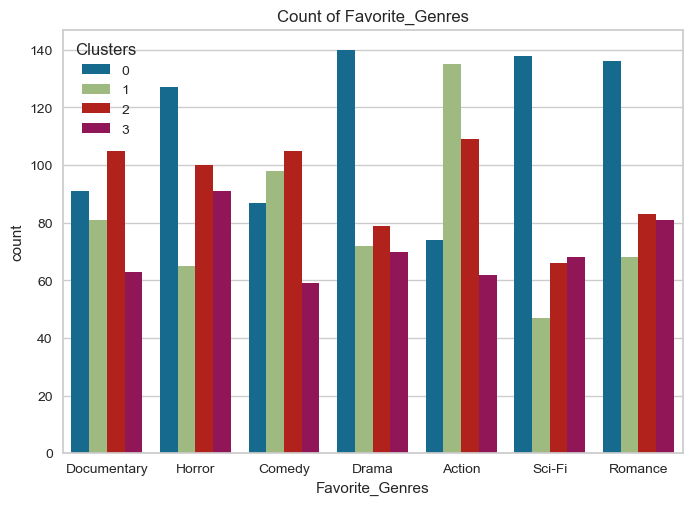

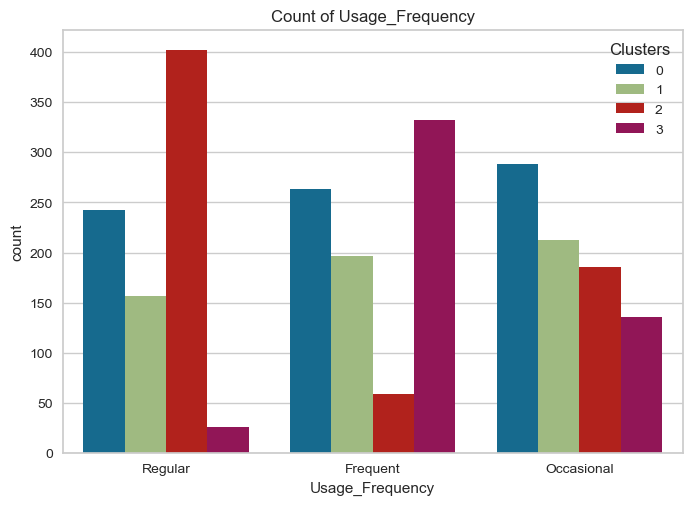

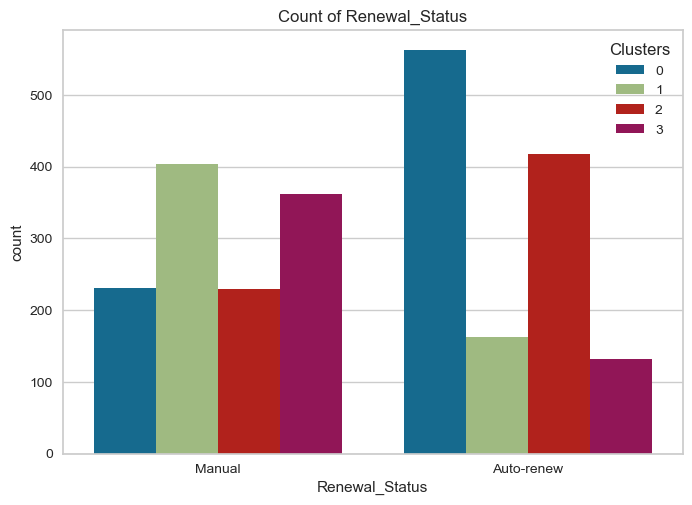

In [168]:
col3 = ["Subscription_Plan", "Gender", "Devices_Used", "Favorite_Genres", "Usage_Frequency", "Renewal_Status"]
for i in col3:
    plt.figure()
    pl = sns.countplot(x=data[i], hue=data["Clusters"])
    pl.set_title(f"Count of {i}")
    pl.set_xlabel(i)
    plt.show()